In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline
from rubin_sim.utils import _galacticFromEquatorial


In [2]:
baseline_file = get_baseline()
run_name = os.path.basename(baseline_file).replace('.db','')
outDir = "temp"
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [3]:
nside = 64
bundleList = []
sql = ""
# Let's plug in the magnitudes for one type
metric = maf.mafContrib.NYoungStarsMetric()
slicer = maf.slicers.HealpixSlicer(nside=nside, useCache=False)

summaryStats = [maf.metrics.SumMetric()]
plotDict = {"logScale": True, "colorMin": 1}
bundleList.append(
    maf.metricBundles.MetricBundle(
        metric, slicer, sql, plotDict=plotDict, summaryMetrics=summaryStats, runName=run_name
    )
)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


Querying database None with no constraint for columns ['fiveSigmaDepth', 'filter', 'fieldRA', 'fieldDec', 'rotSkyPos'].
Found 2045493 visits
Running:  ['baseline_nexp2_v1_7_10yrs_young_stars_HEAL']


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/mafContrib/YoungStellarObjectsMetric.py:119: RuntimeWarning: divide by zero encountered in log10
  depths[filtername] = 1.25 * np.log10(np.sum(10.0 ** (0.8 * dataSlice[self.m5Col][in_filt])))
0.0 180.0 -180.0 180.0


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 1790 bins, returning 200
  warnings.warn(


Plotting complete.


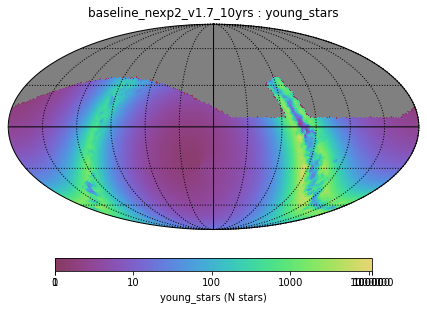

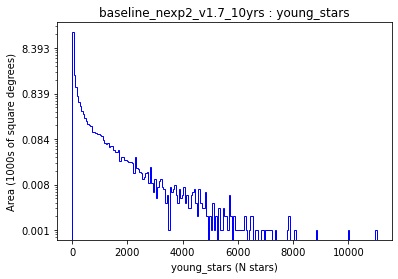

In [4]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, baseline_file, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [5]:
for bl in bundleList:
    print(run_name, bl.metric.name, bl.summaryValues)


baseline_nexp2_v1.7_10yrs young_stars {'Sum': 6444634.451553974}
